# ASOS Example

This example notebook showcases the main features of Meteora. To that end, we will download and process meteorological observations from [the Automated Surface/Weather Observing Systems (ASOS/AWOS) program](https://www.ncei.noaa.gov/products/land-based-station/automated-surface-weather-observing-systems), which comprises more than 900 automated weather stations in the United States.

More precisely, we will use the `ASOSOneMinIEMClient` to stream [the 1-minute ASOS data](https://madis.ncep.noaa.gov/madis_OMO.shtml) from the [Iowa Environmental Mesonet](https://mesonet.agron.iastate.edu/request/asos/1min.phtml)

In [ ]:
import contextily as cx
import osmnx as ox

from meteora.clients import ASOSOneMinIEMClient

For all Meteora clients, the `region` argument is used to specify the geographical region of interest. In this case, we will use the state of Oregon as defined by a query to the [Nominatim API](https://nominatim.org). See the [Selecting a region](https://meteora.readthedocs.io/en/latest/user-guide.html#selecting-a-region) section of the user guide for more details on the accepted argument values.

In [ ]:
region = "Oregon"

We can now instantiate our client:

In [ ]:
client = ASOSOneMinIEMClient(region=region)

## Stations locations and metadata

The list of stations maintained by the provider within the selected region can be accessed using the `stations_gdf` property:

In [ ]:
client.stations_gdf.head()

,id,elevation,sname,time_domain,archive_begin,archive_end,state,country,climate_site,wfo,tzname,ncdc81,ncei91,ugc_county,ugc_zone,county,sid,network,online,geometry
57,AST,7.0,ASTORIA/CLATSOP,(1949-Now),1949-04-01,NaT,OR,US,OR0328,PQR,America/Los_Angeles,USW00094224,USW00094224,ORC007,ORZ001,Clatsop,AST,OR_ASOS,True,POINT (-123.8825 46.1569)
96,BKE,1027.0,BAKER MUNICIPAL,(1948-Now),1948-01-01,NaT,OR,US,OR0412,BOI,America/Los_Angeles,USW00024130,USW00024130,ORC001,ORZ638,Baker,BKE,OR_ASOS,True,POINT (-117.8091 44.8374)
108,BNO,1271.0,BURNS MUNI (AMO,(1972-Now),1972-12-31,NaT,OR,US,OR1175,BOI,America/Los_Angeles,USW00094185,USW00094185,ORC025,ORZ061,Harney,BNO,OR_ASOS,True,POINT (-118.9564 43.595)
264,EUG,114.0,EUGENE/MAHLON SWEET,(1948-Now),1948-01-01,NaT,OR,US,OR2709,PQR,America/Los_Angeles,USW00024221,USW00024221,ORC039,ORZ008,Lane,EUG,OR_ASOS,True,POINT (-123.212 44.1246)
360,HIO,62.0,PORTLAND/HILLSBORO,(1972-Now),1972-12-31,NaT,OR,US,OR2997,PQR,America/Los_Angeles,USW00094261,USW00094261,ORC067,ORZ006,Washington,HIO,OR_ASOS,True,POINT (-122.9502 45.5406)


which is essentially a geopandas data frame that includes station metadata including the location, so we can, e.g., plot it in a map:

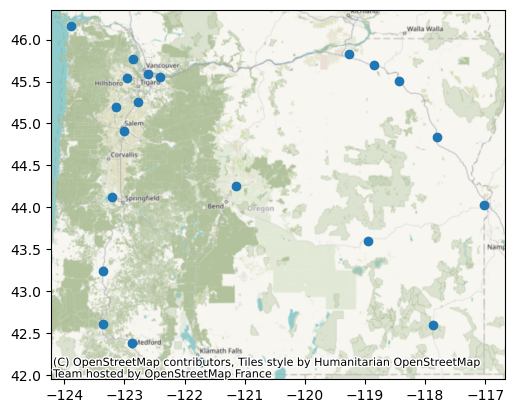

In [ ]:
ax = client.stations_gdf.plot()
cx.add_basemap(ax, crs=client.stations_gdf.crs)

## Variables

The list of variables and their metadata is shown in the `variables_df` property:

In [ ]:
client.variables_df

,code,description
0,tmpf,Air Temperature
1,dwpf,Dew Point Temperature
2,sknt,Wind Speed
3,drct,Wind Direction
4,pres1,Sensor 1 Station Pressure
5,precip,1 minute precip


## Getting a time series of measurements

Given a list of variables and time range, we can use the `get_ts_df` method to get a time series of station measurements:

In [ ]:
variables = ["tmpf", "dwpf", "sknt"]
start = "2021-08-13"
end = "2021-08-16"

ts_df = client.get_ts_df(variables, start=start, end=end)
ts_df

tmpf  dwpf  sknt
station valid(UTC)                           
AST     2021-08-13 00:00:00  68.0  58.0  10.0
        2021-08-13 00:01:00  67.0  58.0  10.0
        2021-08-13 00:02:00  67.0  58.0  10.0
        2021-08-13 00:03:00  67.0  58.0   9.0
        2021-08-13 00:04:00  68.0  59.0   8.0
...                           ...   ...   ...
UAO     2021-08-15 23:55:00  93.0  54.0   2.0
        2021-08-15 23:56:00  94.0  54.0   3.0
        2021-08-15 23:57:00  94.0  54.0   4.0
        2021-08-15 23:58:00  94.0  54.0   3.0
        2021-08-15 23:59:00  93.0  54.0   3.0

[86497 rows x 3 columns]

the variables argument can be the variable codes shown in the `variables_df` property but also a string referring to an essential climate variable (ECV) following the Meteora nomenclature. See the ["Selecting variables"](https://meteora.readthedocs.io/en/latest/user-guide.html#selecting-variables) section of the user guide for more details on the accepted argument values. Similarly, the `start` and `end` arguments [can be provided as several datetime-like objects](https://meteora.readthedocs.io/en/latest/user-guide.html#selecting-date-range).

In [ ]:
variables = ["temperature", "pressure", "precipitation", "surface_wind_speed"]

ts_df = client.get_ts_df(variables, start=start, end=end)
ts_df

temperature  pressure  precipitation  \
station valid(UTC)                                                  
AST     2021-08-13 00:00:00         68.0    29.942            0.0   
        2021-08-13 00:01:00         67.0    29.942            0.0   
        2021-08-13 00:02:00         67.0    29.942            0.0   
        2021-08-13 00:03:00         67.0    29.942            0.0   
        2021-08-13 00:04:00         68.0    29.942            0.0   
...                                  ...       ...            ...   
UAO     2021-08-15 23:55:00         93.0    29.743            0.0   
        2021-08-15 23:56:00         94.0    29.743            0.0   
        2021-08-15 23:57:00         94.0    29.742            0.0   
        2021-08-15 23:58:00         94.0    29.741            0.0   
        2021-08-15 23:59:00         93.0    29.740            0.0   

                             surface_wind_speed  
station valid(UTC)                               
AST     2021-08-13 00:00:00                10.0  
        2021-08-13 00:01:00                10.0  
        2021-08-13 00:02:00                10.0  
        2021-08-13 00:03:00                 9.0  
        2021-08-13 00:04:00                 8.0  
...                                         ...  
UAO     2021-08-15 23:55:00                 2.0  
        2021-08-15 23:56:00                 3.0  
        2021-08-15 23:57:00                 4.0  
        2021-08-15 23:58:00                 3.0  
        2021-08-15 23:59:00                 3.0  

[86497 rows x 4 columns]

## Long versus wide data frames fo time series data

The `get_ts_df` method returns a long data frame where the station and time are used as multi-index levels, so that we can easily select the time series of a specific station:

In [ ]:
station_id = "AST"
ts_df.loc[station_id]

,temperature,pressure,precipitation,surface_wind_speed
valid(UTC),,,,
2021-08-13 00:00:00,68.0,29.942,0.0,10.0
2021-08-13 00:01:00,67.0,29.942,0.0,10.0
2021-08-13 00:02:00,67.0,29.942,0.0,10.0
2021-08-13 00:03:00,67.0,29.942,0.0,9.0
2021-08-13 00:04:00,68.0,29.942,0.0,8.0
...,...,...,...,...
2021-08-15 23:55:00,65.0,30.042,0.0,6.0
2021-08-15 23:56:00,65.0,30.042,0.0,6.0
2021-08-15 23:57:00,65.0,30.043,0.0,7.0


However, we can also convert the long data frame to a wide data frame using the `unstack` method. In the wide data frame, the index is the time and the variables and stations are the multi-level columns:

In [ ]:
wide_ts_df = ts_df.unstack(level="station")
wide_ts_df

temperature                                                \
station                     AST   BKE    BNO    EUG    HIO    HRI   LMT   MEH   
valid(UTC)                                                                      
2021-08-13 00:00:00        68.0  92.0   99.0  104.0  103.0  103.0  98.0  88.0   
2021-08-13 00:01:00        67.0  92.0   98.0  104.0  103.0  103.0  97.0  88.0   
2021-08-13 00:02:00        67.0  92.0   98.0  103.0  103.0  103.0  97.0  88.0   
2021-08-13 00:03:00        67.0  92.0   97.0  103.0  103.0  103.0  97.0  89.0   
2021-08-13 00:04:00        68.0  92.0   98.0  103.0  102.0  103.0  97.0  89.0   
...                         ...   ...    ...    ...    ...    ...   ...   ...   
2021-08-15 23:55:00        65.0  96.0  100.0   97.0   95.0  102.0  97.0  94.0   
2021-08-15 23:56:00        65.0  96.0  100.0   96.0   94.0  102.0  98.0  93.0   
2021-08-15 23:57:00        65.0  96.0  100.0   98.0   94.0  102.0  97.0  94.0   
2021-08-15 23:58:00        65.0  96.0  100.0   97.0   94.0  102.0  97.0  94.0   
2021-08-15 23:59:00        65.0  96.0  100.0   96.0   93.0  102.0  98.0  94.0   

                                   ... surface_wind_speed                   \
station                MFR    MMV  ...                PDT   PDX  RBG   RDM   
valid(UTC)                         ...                                       
2021-08-13 00:00:00  101.0  102.0  ...                9.0  10.0  8.0  15.0   
2021-08-13 00:01:00  102.0  102.0  ...                8.0  10.0  7.0  14.0   
2021-08-13 00:02:00  102.0  102.0  ...                8.0  10.0  6.0  14.0   
2021-08-13 00:03:00  102.0  102.0  ...                9.0   9.0  5.0  13.0   
2021-08-13 00:04:00  101.0  102.0  ...                9.0   8.0  5.0  13.0   
...                    ...    ...  ...                ...   ...  ...   ...   
2021-08-15 23:55:00  100.0   92.0  ...                8.0   8.0  5.0  10.0   
2021-08-15 23:56:00  100.0   93.0  ...                9.0   8.0  6.0  10.0   
2021-08-15 23:57:00  100.0   93.0  ...                9.0   9.0  7.0  10.0   
2021-08-15 23:58:00  100.0   94.0  ...                8.0   9.0  7.0   9.0   
2021-08-15 23:59:00  100.0   94.0  ...                9.0   9.0  8.0  11.0   

                                                   
station              REO  SLE  SPB  SXT  TTD  UAO  
valid(UTC)                                         
2021-08-13 00:00:00  NaN  5.0  2.0  2.0  3.0  3.0  
2021-08-13 00:01:00  NaN  4.0  2.0  2.0  3.0  2.0  
2021-08-13 00:02:00  NaN  4.0  3.0  1.0  3.0  1.0  
2021-08-13 00:03:00  NaN  6.0  5.0  2.0  3.0  1.0  
2021-08-13 00:04:00  NaN  7.0  4.0  2.0  4.0  1.0  
...                  ...  ...  ...  ...  ...  ...  
2021-08-15 23:55:00  5.0  6.0  6.0  4.0  6.0  2.0  
2021-08-15 23:56:00  4.0  6.0  7.0  4.0  7.0  3.0  
2021-08-15 23:57:00  4.0  5.0  6.0  3.0  7.0  4.0  
2021-08-15 23:58:00  5.0  4.0  8.0  3.0  6.0  3.0  
2021-08-15 23:59:00  6.0  5.0  8.0  3.0  6.0  3.0  

[4320 rows x 84 columns]

Accordingly, we can easily select the time series of a specific variable:

In [ ]:
wide_ts_df["temperature"]

station,AST,BKE,BNO,EUG,HIO,HRI,LMT,MEH,MFR,MMV,...,PDT,PDX,RBG,RDM,REO,SLE,SPB,SXT,TTD,UAO
valid(UTC),,,,,,,,,,,,,,,,,,,,,
2021-08-13 00:00:00,68.0,92.0,99.0,104.0,103.0,103.0,98.0,88.0,101.0,102.0,...,100.0,102.0,100.0,99.0,NaN,102.0,107.0,87.0,102.0,103.0
2021-08-13 00:01:00,67.0,92.0,98.0,104.0,103.0,103.0,97.0,88.0,102.0,102.0,...,99.0,102.0,101.0,100.0,NaN,103.0,107.0,86.0,103.0,103.0
2021-08-13 00:02:00,67.0,92.0,98.0,103.0,103.0,103.0,97.0,88.0,102.0,102.0,...,99.0,102.0,100.0,101.0,NaN,103.0,106.0,87.0,103.0,103.0
2021-08-13 00:03:00,67.0,92.0,97.0,103.0,103.0,103.0,97.0,89.0,102.0,102.0,...,100.0,102.0,101.0,101.0,NaN,103.0,106.0,87.0,103.0,104.0
2021-08-13 00:04:00,68.0,92.0,98.0,103.0,102.0,103.0,97.0,89.0,101.0,102.0,...,99.0,103.0,101.0,100.0,NaN,103.0,106.0,87.0,102.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15 23:55:00,65.0,96.0,100.0,97.0,95.0,102.0,97.0,94.0,100.0,92.0,...,101.0,93.0,96.0,101.0,101.0,97.0,94.0,84.0,95.0,93.0
2021-08-15 23:56:00,65.0,96.0,100.0,96.0,94.0,102.0,98.0,93.0,100.0,93.0,...,102.0,94.0,97.0,102.0,102.0,97.0,94.0,85.0,95.0,94.0
2021-08-15 23:57:00,65.0,96.0,100.0,98.0,94.0,102.0,97.0,94.0,100.0,93.0,...,101.0,94.0,96.0,102.0,102.0,97.0,93.0,85.0,95.0,94.0


The key advantage of the wide data frame is that time series operations are supported by pandas out-of-the-box. For example, we can easily select a time range and plot the temperature time series of all stations:

<Axes: xlabel='valid(UTC)'>

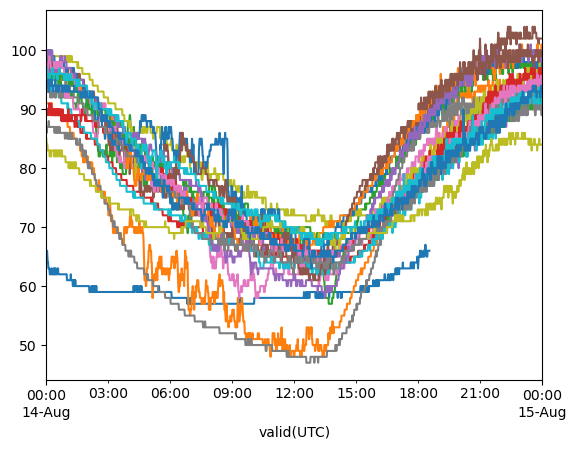

In [ ]:
wide_ts_df.loc["2021-08-14 00:00:00":"2021-08-15 00:00:00"]["temperature"].plot(
    legend=False
)

We can also resample the time series to a different frequency, e.g., we can compute the hourly mean temperature time series of all stations:

<Axes: xlabel='valid(UTC)'>

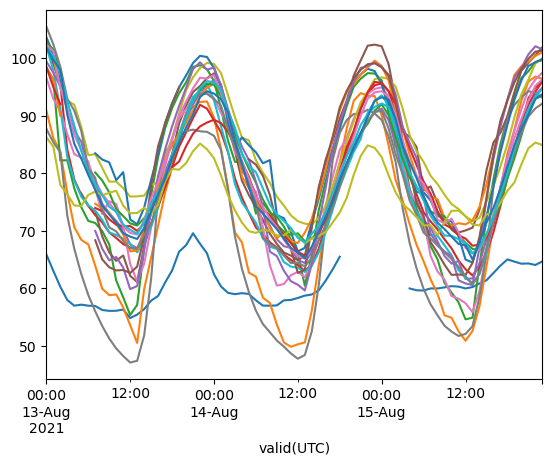

In [ ]:
wide_ts_df.resample("h")["temperature"].mean().plot(legend=False)


## Example geospatial operations

Since the `stations_gdf` property is a geopandas data frame, we can use geospatial operations to filter stations based on their location. For example, we can select stations within a buffer around a specific location:

In [ ]:
query = "Portland, Oregon"
buffer_dist = 20e3  # in meters

extent_geom = (
    ox.project_gdf(ox.geocode_to_gdf(query))
    .buffer(buffer_dist)
    .to_crs(client.stations_gdf.crs)
    .iloc[0]
)
client.stations_gdf[client.stations_gdf.within(extent_geom)]

,id,elevation,sname,time_domain,archive_begin,archive_end,state,country,climate_site,wfo,tzname,ncdc81,ncei91,ugc_county,ugc_zone,county,sid,network,online,geometry
360,HIO,62.000000,PORTLAND/HILLSBORO,(1972-Now),1972-12-31,NaT,OR,US,OR2997,PQR,America/Los_Angeles,USW00094261,USW00094261,ORC067,ORZ006,Washington,HIO,OR_ASOS,True,POINT (-122.9502 45.5406)
686,PDX,12.000000,PORTLAND INTL ARPT,(1936-Now),1936-05-01,NaT,OR,US,OR6751,PQR,America/Los_Angeles,USW00024229,USW00024229,ORC051,ORZ006,Multnomah,PDX,OR_ASOS,True,POINT (-122.6003 45.5908)
820,SPB,17.000000,SCAPPOOSE INDUSTRIAL APK (1S4),(1978-Now),1978-07-11,NaT,OR,US,ORTPGW,PQR,America/Los_Angeles,USW00004201,USW00004201,ORC009,ORZ006,Washington,SPB,OR_ASOS,True,POINT (-122.86 45.77)
865,TTD,-0.150021,Portland - Troutdale,(1948-Now),1948-01-01,NaT,OR,US,OR8634,PQR,America/Los_Angeles,USW00024242,USW00024242,ORC051,ORZ604,Multnomah,TTD,OR_ASOS,True,POINT (-122.4098 45.551)


We can also select the time series of the stations within the buffer:

In [ ]:
ts_df.loc[client.stations_gdf[client.stations_gdf.within(extent_geom)]["id"]]

temperature  pressure  precipitation  \
station valid(UTC)                                                  
HIO     2021-08-13 00:00:00        103.0    29.619            0.0   
        2021-08-13 00:01:00        103.0    29.619            0.0   
        2021-08-13 00:02:00        103.0    29.619            0.0   
        2021-08-13 00:03:00        103.0    29.619            0.0   
        2021-08-13 00:04:00        102.0    29.619            0.0   
...                                  ...       ...            ...   
TTD     2021-08-15 23:55:00         95.0    29.886            0.0   
        2021-08-15 23:56:00         95.0    29.886            0.0   
        2021-08-15 23:57:00         95.0    29.885            0.0   
        2021-08-15 23:58:00         95.0    29.884            0.0   
        2021-08-15 23:59:00         95.0    29.884            0.0   

                             surface_wind_speed  
station valid(UTC)                               
HIO     2021-08-13 00:00:00                 6.0  
        2021-08-13 00:01:00                 7.0  
        2021-08-13 00:02:00                 7.0  
        2021-08-13 00:03:00                 8.0  
        2021-08-13 00:04:00                 7.0  
...                                         ...  
TTD     2021-08-15 23:55:00                 6.0  
        2021-08-15 23:56:00                 7.0  
        2021-08-15 23:57:00                 7.0  
        2021-08-15 23:58:00                 6.0  
        2021-08-15 23:59:00                 6.0  

[16818 rows x 4 columns]

As a final example, we can plot the stations by mean temperature over the requetsed period:

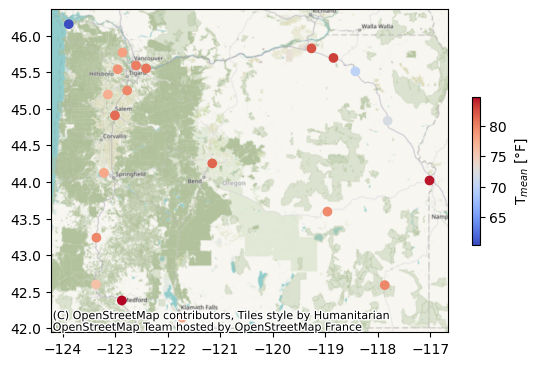

In [ ]:
t_mean_label = "T$_{mean}$ [°F]"

ax = (
    client.stations_gdf.set_index("id")
    .assign(**{t_mean_label: ts_df.groupby("station")["temperature"].mean()})
    .plot(
        t_mean_label,
        cmap="coolwarm",
        legend=True,
        legend_kwds={"label": t_mean_label, "shrink": 0.4},
    )
)
cx.add_basemap(ax, crs=client.stations_gdf.crs)